# XSBench
XSBench is a mini-app representing a key computational kernel of the
Monte Carlo neutronics application OpenMC.

---
## Parameters 
```
Compiler = icc (ICC) 18.0.1 20171018
Build_Flags = -g -O3 -march=native -qopenmp
Run_Parameters = -l 100000000 -t 56 // # threads
```
Using the unionized grid, which is faster but takes more memory than the nuclide grid.  The hash grid is slightly slower than the unionized grid while using less memory.

---
## Scaling

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

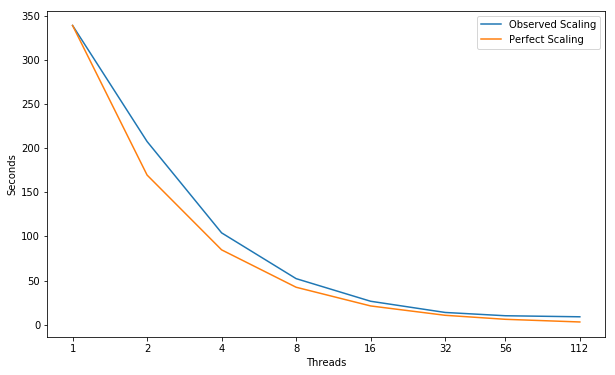

In [3]:
threads = [1, 2, 4, 8, 16, 32, 56, 112]
observedScaling = [339.0, 207.5, 104.0, 52.125, 26.5, 13.8125, 10.089285714285714, 8.901785714285714]
perfectScaling = [339.0, 169.5, 84.75, 42.375, 21.1875, 10.59375, 6.053571428571429, 3.0267857142857144]
fig, ax = plt.subplots(); ax.set_xscale("log", basex=2); ax.set_xticks(threads)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.plot(threads, observedScaling, label="Observed Scaling")
ax.plot(threads, perfectScaling, label="Perfect Scaling")
ax.legend(); ax.set_xlabel("Threads"); ax.set_ylabel("Seconds")
plt.show()

---
## Performance Improvement

| Threads | 2 | 4 | 8 | 16 | 32 | 56 | 112 |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Speed Up** | 1.63X | 2.00X | 2.00X | 1.97X | 1.92X | 1.37X | 1.13X |

#### \* We Stop Scaling.  Limited by Some Resource


---
## Cache Miss Scaling

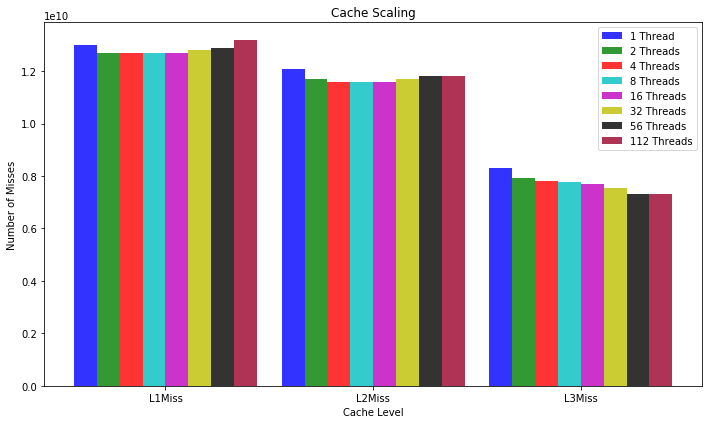

In [4]:
objects = ("L1Miss", "L2Miss", "L3Miss")
index = np.arange(len(objects)); bar_width = 0.11; opacity = 0.8

Thread1 = [13000000000.0, 12100000000.0, 8320000000.0]
Thread2 = [12700000000.0, 11700000000.0, 7910000000.0]
Thread4 = [12700000000.0, 11600000000.0, 7830000000.0]
Thread8 = [12700000000.0, 11600000000.0, 7760000000.0]
Thread16 = [12700000000.0, 11600000000.0, 7680000000.0]
Thread32 = [12800000000.0, 11700000000.0, 7560000000.0]
Thread56 = [12900000000.0, 11800000000.0, 7310000000.0]
Thread112 = [13200000000.0, 11800000000.0, 7320000000.0]

plt.bar(index, Thread1, bar_width, alpha=opacity, color="b", label="1 Thread")
plt.bar(index + bar_width, Thread2, bar_width, alpha=opacity, color="g", label="2 Threads")
plt.bar(index + (bar_width * 2), Thread4, bar_width, alpha=opacity, color="r", label="4 Threads")
plt.bar(index + (bar_width * 3), Thread8, bar_width, alpha=opacity, color="c", label="8 Threads")
plt.bar(index + (bar_width * 4), Thread16, bar_width, alpha=opacity, color="m", label="16 Threads")
plt.bar(index + (bar_width * 5), Thread32, bar_width, alpha=opacity, color="y", label="32 Threads")
plt.bar(index + (bar_width * 6), Thread56, bar_width, alpha=opacity, color="k", label="56 Threads")
plt.bar(index + (bar_width * 7), Thread112, bar_width, alpha=opacity, color="#9B0029", label="112 Threads")

plt.xlabel("Cache Level"); plt.ylabel("Number of Misses")
plt.xticks(index + (bar_width*3.5), objects); plt.title("Cache Scaling"); plt.legend()

plt.tight_layout()
plt.show()

#### \* We are not cache sensitive

---
## Hit Locations


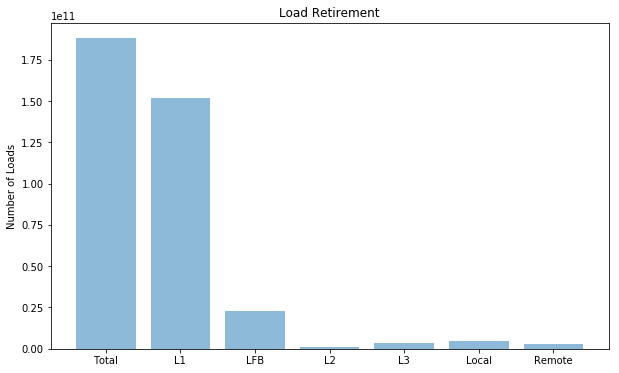

In [3]:
objects = ('Total', 'L1', 'LFB', 'L2', 'L3', 'Local', 'Remote')
y_pos = np.arange(len(objects))
measurements = [1.88e+11, 1.52e+11, 23100000000.0, 1050000000.0, 3630000000.0, 4528318584.07, 2781681415.93]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Loads"); plt.title("Load Retirement")

plt.show()

---
## FLOPS
| Double Precision | Scalar | 128B Packed | 256B Packed | 512B Packed | Total FLOPS | GFLOPS/sec |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
| PMU | 4.720e+10 | 0.000e+00 | 2.790e+10 | 0.000e+00 | 1.588e+11 | 1.574e+01 |
| SDE | 4.584e+10 | 0.000e+00 | 2.222e+10 | 0.000e+00 | 1.347e+11 | 1.328e+01 |

---
### Roofline - Intel(R) Xeon(R) Platinum 8180M CPU
#### 112 Threads - 56 - Cores 3200.0 Mhz  
|     GB/sec     |  L1 B/W |  L2 B/W |  L3 B/W | DRAM B/W |
|:---------------|:-------:|:-------:|:-------:|:--------:|
|**1 Thread**    |  159.33 |  91.42 |    47.08 |    21.27|
|**56 Threads**  | 9816.2 | 5579.1 |  1050.00\* |   198.4 |
|**112 Threads** | 9912.56 | 5573.58 |  1050.00\* |   203.13  |
#### \* L3 BW ERT unable to recognize.  Very short plateau ( estimate taken from graph3 )

---
### Intel Software Development Emulator
| Intel SDE | XSBench |
|:---|:---:|
| **Arithmetric Intensity** | 0.0515 |
| **FLOPS per Inst** | 0.286 |
| **FLOPS per FP Inst** | 1.98 |
| **Bytes per Load Inst** | 10.3 |
| **Bytes per Store Inst** | 11.8 |

<img src="XSBench.png">

---
## UOPS Executed

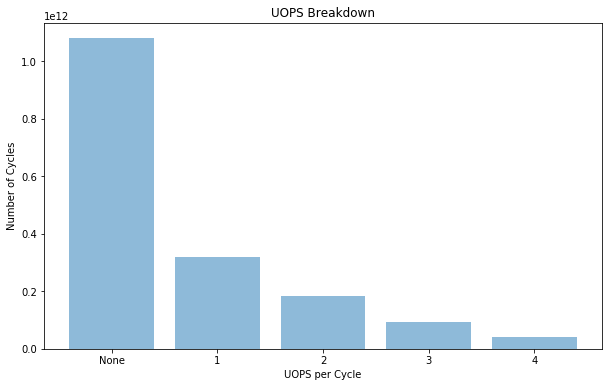

In [4]:
objects = ('None', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
measurements = [1.08e+12, 3.19e+11, 1.84e+11, 94200000000.0, 41800000000.0]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Cycles")
plt.xlabel("UOPS per Cycle"); plt.title("UOPS Breakdown")

plt.show()


---
## Experiment Aggregate Metrics
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (100.0%)| 0.54 | 0.43 | 0.34 | 7.10% | 46.89% | 68.53% | 4.04% | 13.22% | 14.63% | 0.04% |
|56 (100.0%)| 0.35 | 0.27 | 0.22 | 6.86% | 46.25% | 66.82% | 2.33% | 15.89% | 55.09% | 0.04% |
|112 (100.0%)| 0.40 | 0.16 | 0.13 | 6.91% | 44.55% | 67.22% | 2.69% | 17.60% | 58.67% | 0.04% |

---
## `main` omp loop
```c
153         // OpenMP compiler directives - declaring variables as shared or private
154         #pragma omp parallel default(none) \
155         private(i, thread, p_energy, mat, seed) \
156         shared( in, energy_grid, nuclide_grids, \
157                 mats, concs, num_nucs, mype, vhash) 
158         {
159                 // Initialize parallel PAPI counters
160                 #ifdef PAPI
                    {...}
167                 #endif
168 
169                 double macro_xs_vector[5];
170                 double * xs = (double *) calloc(5, sizeof(double));
171 
172                 // Initialize RNG seeds for threads
173                 thread = omp_get_thread_num();
174                 seed   = (thread+1)*19+17;
175 
176                 // XS Lookup Loop
177                 #pragma omp for schedule(dynamic)
178                 for( i = 0; i < in.lookups; i++ )
179                 {
180                         // Status text
181                         if( INFO && mype == 0 && thread == 0 && i % 1000 == 0 )
182                                 printf("\rCalculating XS's... (%.0lf%% completed)",
183                                                 (i / ( (double)in.lookups / (double) in.nthreads ))
184                                                 / (double) in.nthreads * 100.0);
185 
186                         // Randomly pick an energy and material for the particle
187                         #ifdef VERIFICATION
                            {...}
196                         #endif
197 
198                         // debugging
199                         //printf("E = %lf mat = %d\n", p_energy, mat);
200 
201                         // This returns the macro_xs_vector, but we're not going
202                         // to do anything with it in this program, so return value
203                         // is written over.
204                         calculate_macro_xs( p_energy, mat, in.n_isotopes,
205                                                                 in.n_gridpoints, num_nucs, concs,
206                                                                 energy_grid, nuclide_grids, mats,
207                                                                 macro_xs_vector, in.grid_type, in.hash_bins );
208 
209                         // Copy results from above function call onto heap
210                         // so that compiler cannot optimize function out
211                         // (only occurs if -flto flag is used)
212                         memcpy(xs, macro_xs_vector, 5*sizeof(double));
213 
214                         // Verification hash calculation
215                         // This method provides a consistent hash accross
216                         // architectures and compilers.
217                         #ifdef VERIFICATION
                            {...}
229                         #endif
230                 }
231 
232                 // Prints out thread local PAPI counters
233                 #ifdef PAPI
                    {...}
246                 #endif
248         }
```

---
## `calculate_macro_xs`
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (97.4%)| 0.50 | 0.41 | 0.33 | 7.49% | 46.83% | 68.69% | 4.04% | 13.31% | 14.86% | 0.04% |
|56 (83.4%)| 0.36 | 0.28 | 0.23 | 7.31% | 46.53% | 67.07% | 2.69% | 18.55% | 64.65% | 0.05% |
|112 (72.6%)| 0.44 | 0.19 | 0.15 | 7.36% | 44.90% | 67.44% | 3.30% | 21.73% | 72.17% | 0.05% |
```c
101 void calculate_macro_xs( double p_energy, int mat, long n_isotopes,
102                          long n_gridpoints, int * restrict num_nucs,
103                          double ** restrict concs,
104                          GridPoint * restrict energy_grid,
105                          NuclideGridPoint ** restrict nuclide_grids,
106                          int ** restrict mats,
107                          double * restrict macro_xs_vector, int grid_type, int hash_bins ){
108         double xs_vector[5];
109         int p_nuc; // the nuclide we are looking up
110         long idx = -1;
111         double conc; // the concentration of the nuclide in the material
112 
113         // cleans out macro_xs_vector
114         for( int k = 0; k < 5; k++ )
115                 macro_xs_vector[k] = 0;
116 
117         // If we are using the unionized energy grid (UEG), we only
118         // need to perform 1 binary search per macroscopic lookup.
119         // If we are using the nuclide grid search, it will have to be
120         // done inside of the "calculate_micro_xs" function for each different
121         // nuclide in the material.
122         if( grid_type == UNIONIZED )
123                 idx = grid_search( n_isotopes * n_gridpoints, p_energy,
124                                energy_grid);
125         else if( grid_type == HASH )
126         {
               {...}
129         }
130 
131         // Once we find the pointer array on the UEG, we can pull the data
132         // from the respective nuclide grids, as well as the nuclide
133         // concentration data for the material
134         // Each nuclide from the material needs to have its micro-XS array
135         // looked up & interpolatied (via calculate_micro_xs). Then, the
136         // micro XS is multiplied by the concentration of that nuclide
137         // in the material, and added to the total macro XS array.
138         for( int j = 0; j < num_nucs[mat]; j++ )
139         {
140                 p_nuc = mats[mat][j];
141                 conc = concs[mat][j];
142                 calculate_micro_xs( p_energy, p_nuc, n_isotopes,
143                                     n_gridpoints, energy_grid,
144                                     nuclide_grids, idx, xs_vector, grid_type, hash_bins );
145                 for( int k = 0; k < 5; k++ )
146                         macro_xs_vector[k] += xs_vector[k] * conc;
147         }
        {...}
155 }
```

---
## `[I] grid_search`
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (16.3%)| 0.29 | 0.06 | 0.04 | 38.37% | 38.04% | 37.93% | 4.48% | 12.55% | 14.54% | 0.22% |
|56 (12.8%)| 0.23 | 0.05 | 0.03 | 38.00% | 38.60% | 35.61% | 3.22% | 19.44% | 68.60% | 0.27% |
|112 (7.9%)| 0.41 | 0.04 | 0.02 | 43.16% | 39.89% | 35.28% | 4.74% | 28.81% | 96.22% | 0.11% |
```c
158 // (fixed) binary search for energy on unionized energy grid
159 // returns lower index
160 long grid_search( long n, double quarry, GridPoint * A)
161 {
162         long lowerLimit = 0;
163         long upperLimit = n-1;
164         long examinationPoint;
165         long length = upperLimit - lowerLimit;
166 
167         while( length > 1 )
168         {
169                 examinationPoint = lowerLimit + ( length / 2 );
170 
171                 if( A[examinationPoint].energy > quarry )
172                         upperLimit = examinationPoint;
173                 else
174                         lowerLimit = examinationPoint;
175 
176                 length = upperLimit - lowerLimit;
177         }
178 
179         return lowerLimit;
180 }
```

---
## `calculate_micro_xs`
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (72.2%)| 0.49 | 0.42 | 0.35 | 6.11% | 49.46% | 72.74% | 3.43% | 11.42% | 14.36% | 0.03% |
|56 (65.5%)| 0.34 | 0.28 | 0.24 | 5.83% | 48.97% | 72.66% | 2.37% | 16.55% | 61.84% | 0.03% |
|112 (61.0%)| 0.42 | 0.18 | 0.15 | 6.39% | 45.93% | 72.88% | 2.95% | 19.66% | 68.11% | 0.04% |
```c
  3 // Calculates the microscopic cross section for a given nuclide & energy
  4 void calculate_micro_xs(   double p_energy, int nuc, long n_isotopes,
  5                            long n_gridpoints,
  6                            GridPoint * restrict energy_grid,
  7                            NuclideGridPoint ** restrict nuclide_grids,
  8                            long idx, double * restrict xs_vector, int grid_type, int hash_bins ){
  9         // Variables
 10         double f;
 11         NuclideGridPoint * low, * high;
 12 
 13         // If using only the nuclide grid, we must perform a binary search
 14         // to find the energy location in this particular nuclide's grid.
 15         if( grid_type == NUCLIDE )
 16         {
               {...}
 26         }
 27         else if( grid_type == UNIONIZED) // Unionized Energy Grid - we already know the index, no binary search needed.
 28         {
 29                 // pull ptr from energy grid and check to ensure that
 30                 // we're not reading off the end of the nuclide's grid
 31                 if( energy_grid[idx].xs_ptrs[nuc] == n_gridpoints - 1 )
 32                         low = &nuclide_grids[nuc][energy_grid[idx].xs_ptrs[nuc] - 1];
 33                 else
 34                         low = &nuclide_grids[nuc][energy_grid[idx].xs_ptrs[nuc]];
 35         }
 36         else // Hash grid
 37         {
               {...}
 65         }
 66 
 67         high = low + 1;
 68 
 69         // calculate the re-useable interpolation factor
 70         f = (high->energy - p_energy) / (high->energy - low->energy);
 71 
 72         // Total XS
 73         xs_vector[0] = high->total_xs - f * (high->total_xs - low->total_xs);
 74 
 75         // Elastic XS
 76         xs_vector[1] = high->elastic_xs - f * (high->elastic_xs - low->elastic_xs);
 77 
 78         // Absorbtion XS
 79         xs_vector[2] = high->absorbtion_xs - f * (high->absorbtion_xs - low->absorbtion_xs);
 80 
 81         // Fission XS
 82         xs_vector[3] = high->fission_xs - f * (high->fission_xs - low->fission_xs);
 83 
 84         // Nu Fission XS
 85         xs_vector[4] = high->nu_fission_xs - f * (high->nu_fission_xs - low->nu_fission_xs);
 86 
            {...}
 98 }
```

## Memory Bound
### Bound by the DRAM access, while being unable to make use of the smaller caches in the memory hierarchy